In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv("../Datasets/12-health_risk_classification.csv")
df

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1
...,...,...,...,...
995,0.640158,-1.962795,-0.541917,0
996,-2.784745,2.717867,-1.894291,1
997,0.238598,0.840739,0.946540,1
998,-1.044982,-0.055455,-1.496340,1


In [3]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


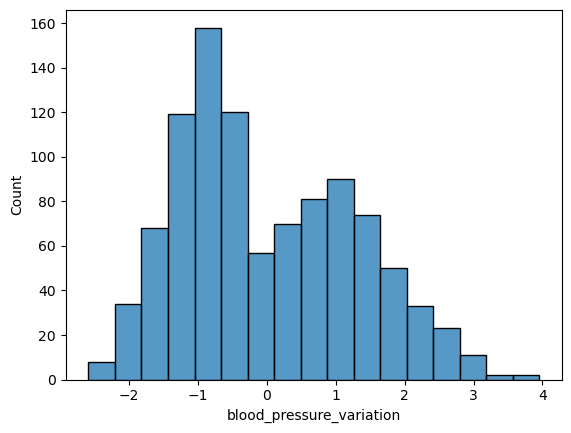

In [5]:
sns.histplot(df["blood_pressure_variation"])
plt.show()

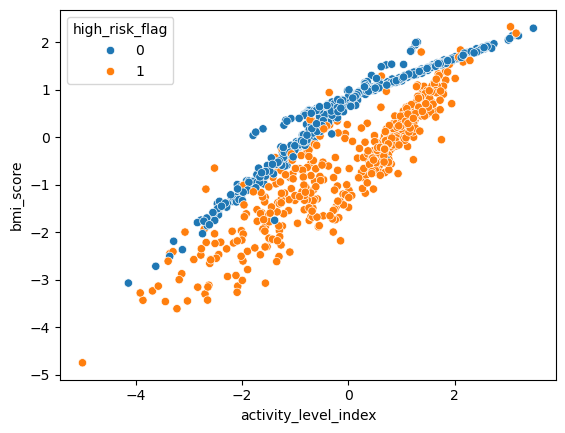

In [6]:
sns.scatterplot(x=df["activity_level_index"],y=df["bmi_score"],hue=df["high_risk_flag"])
plt.show()

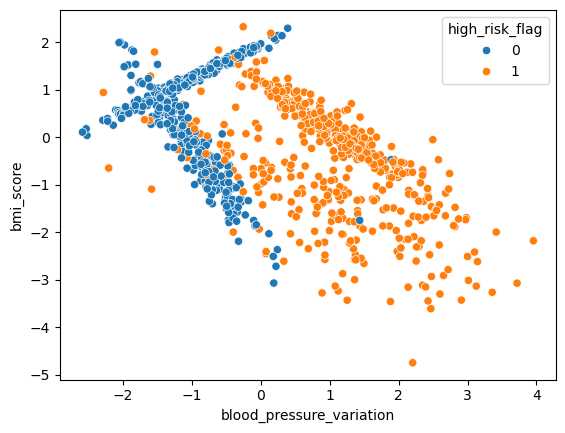

In [7]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["bmi_score"],hue=df["high_risk_flag"])
plt.show()

In [8]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [9]:
X = df.drop("high_risk_flag",axis=1)
y = df["high_risk_flag"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model_knnclass = KNeighborsClassifier()
model_knnclass.fit(X_train,y_train)
y_preds = model_knnclass.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[124   2]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [19]:
df_reg = pd.read_csv("../Datasets/12-house_energy_regression.csv")
df_reg

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530
...,...,...,...
995,-0.753965,-0.280675,-33.182365
996,-2.172670,0.847422,-71.059718
997,0.302635,-0.754276,3.260515
998,0.381935,0.430042,42.654703


In [13]:
df.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


In [20]:
X = df_reg.drop("daily_energy_consumption_kwh",axis=1)
y = df["daily_energy_consumption_kwh"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

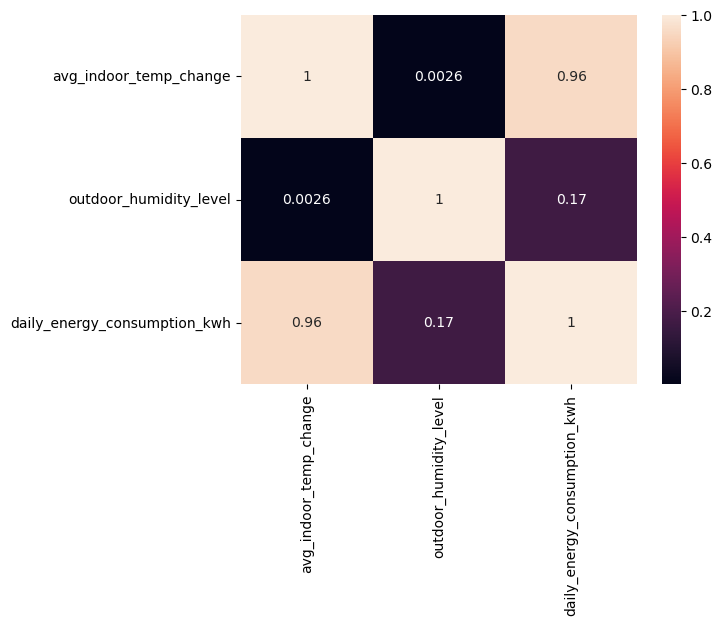

In [25]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model_knnreg = KNeighborsRegressor(n_neighbors=6)
model_knnreg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [37]:
y_preds = model_knnreg.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
score = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2 Score: {score}")

MAE: 9.378910676423477 | MSE: 136.6306113819891 | R2 Score: 0.917727104736901
